In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv('vgsales.csv')

# Optional: Check missing values first
print(df['Year'].isna().sum())

# Drop rows with missing 'Year'
df = df.dropna(subset=['Year'])

# Now safely convert to int
df['Year'] = df['Year'].astype(int)

# Drop duplicate rows
if df.duplicated().any():
    df.drop_duplicates(inplace=True)

# Outlier detection using IQR
numeric_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
condition = ~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
df = df[condition]

271


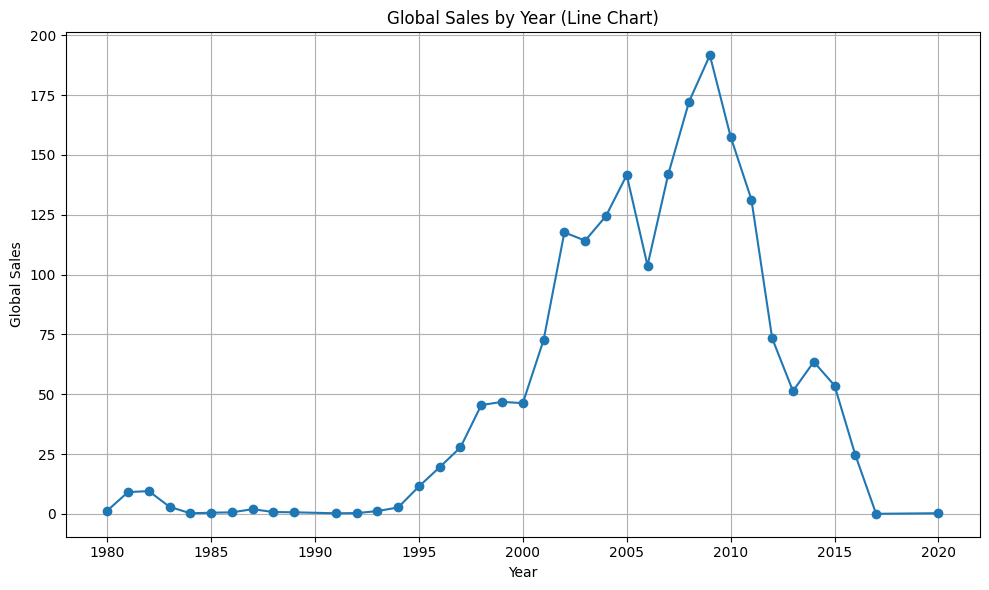

In [5]:
# Line Chart
plt.figure(figsize=(10,6))
df.groupby('Year')['Global_Sales'].sum().plot(kind='line', marker='o')
plt.title("Global Sales by Year (Line Chart)")
plt.xlabel("Year")
plt.ylabel("Global Sales")
plt.grid(True)
plt.tight_layout()
plt.show()
print('\n\n\n')

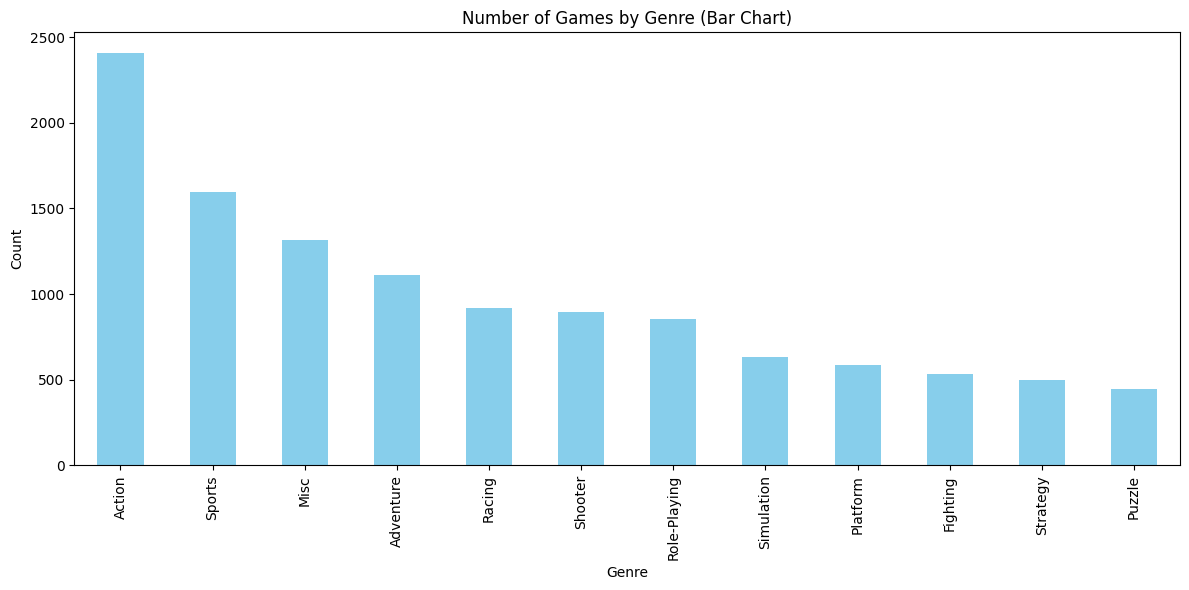

In [6]:
# Bar Chart
plt.figure(figsize=(12,6))
df['Genre'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Number of Games by Genre (Bar Chart)")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
print('\n\n\n')

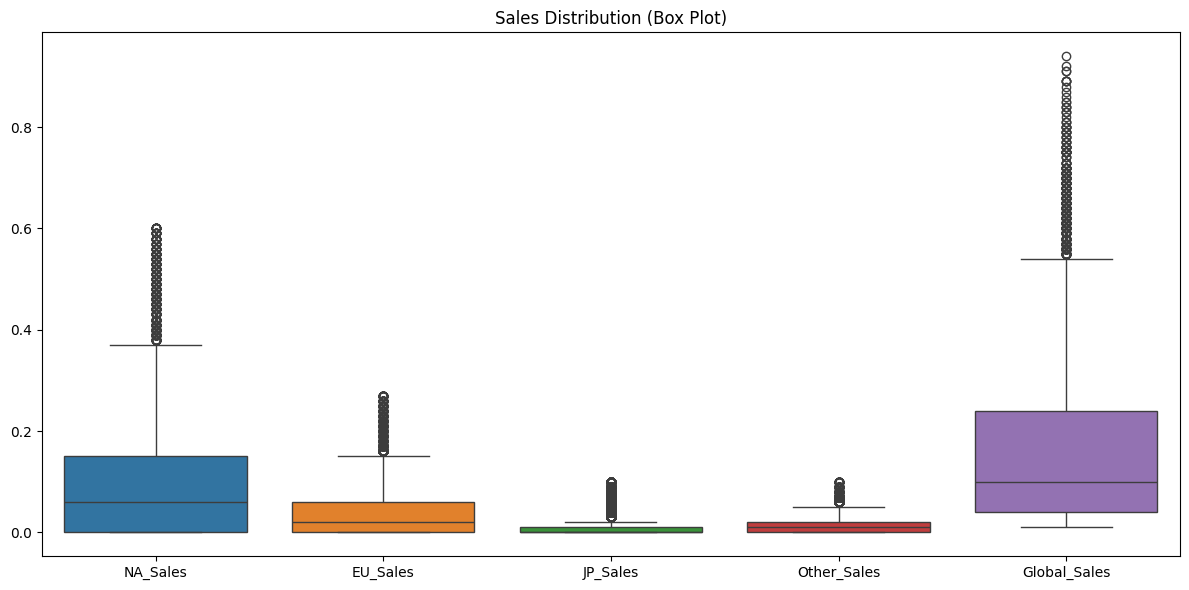

In [7]:
# Box plot
plt.figure(figsize=(12,6))
sns.boxplot(data=df[numeric_cols])
plt.title("Sales Distribution (Box Plot)")
plt.tight_layout()
plt.show()
print('\n\n\n')

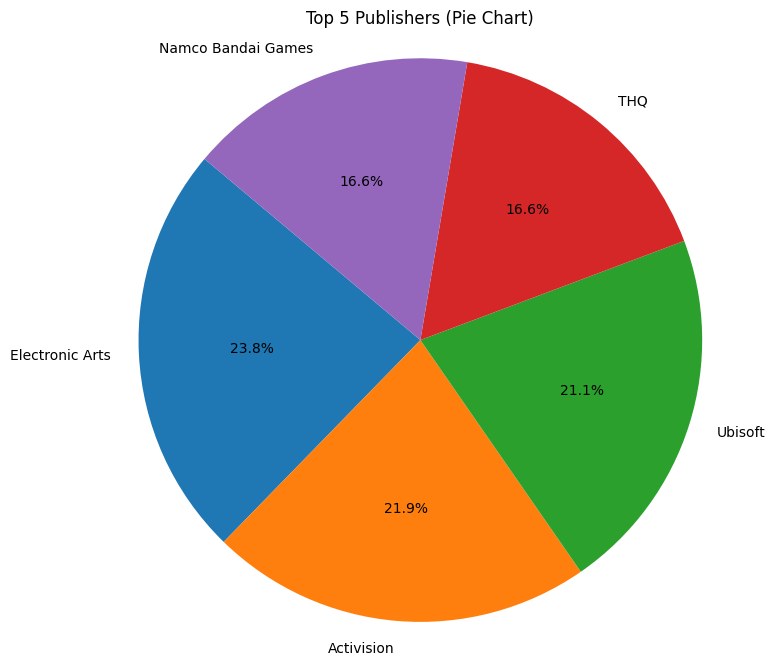

In [8]:
# Pie Chart
plt.figure(figsize=(8,8))
top_publishers = df['Publisher'].value_counts().head(5)
plt.pie(top_publishers, labels=top_publishers.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Publishers (Pie Chart)")
plt.axis('equal')
plt.show()
print('\n\n\n')

C:\Users\ABBAS\AppData\Local\Temp\ipykernel_5688\3596120334.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Global_Sales'], shade=True, color='green')


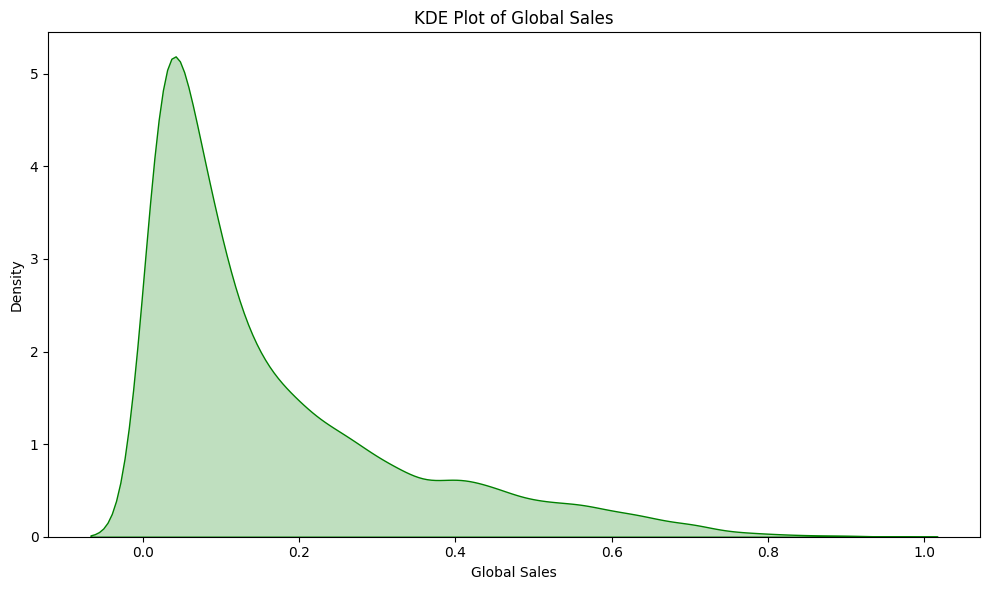

In [9]:
# KDE
plt.figure(figsize=(10,6))
sns.kdeplot(df['Global_Sales'], shade=True, color='green')
plt.title("KDE Plot of Global Sales")
plt.xlabel("Global Sales")
plt.tight_layout()
plt.show()
print('\n\n\n')

In [10]:
# Imported necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Defined features and target
X = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
y = df['Global_Sales']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [11]:
# Print evaluation metrics
print("Mean Squared Error:", mse)
print("R² Score:", r2)

# Print feature coefficients and intercept
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")
print("Intercept:", model.intercept_)

Mean Squared Error: 2.717797215647281e-05
R² Score: 0.9990728692814144
NA_Sales: 1.0017062463135598
EU_Sales: 1.0056560804863397
JP_Sales: 0.98737654458231
Other_Sales: 0.9453588068881635
Intercept: 0.0009158885333441225


In [12]:
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

# XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)

In [13]:
print("\nRandom Forest Regressor:")
print("Mean Squared Error:", rf_mse)
print("R² Score:", rf_r2)

print("\nXGBoost Regressor:")
print("Mean Squared Error:", xgb_mse)
print("R² Score:", xgb_r2)


Random Forest Regressor:
Mean Squared Error: 8.460146826705968e-05
R² Score: 0.9971139634842419

XGBoost Regressor:
Mean Squared Error: 5.316522541350951e-05
R² Score: 0.9981863579314304


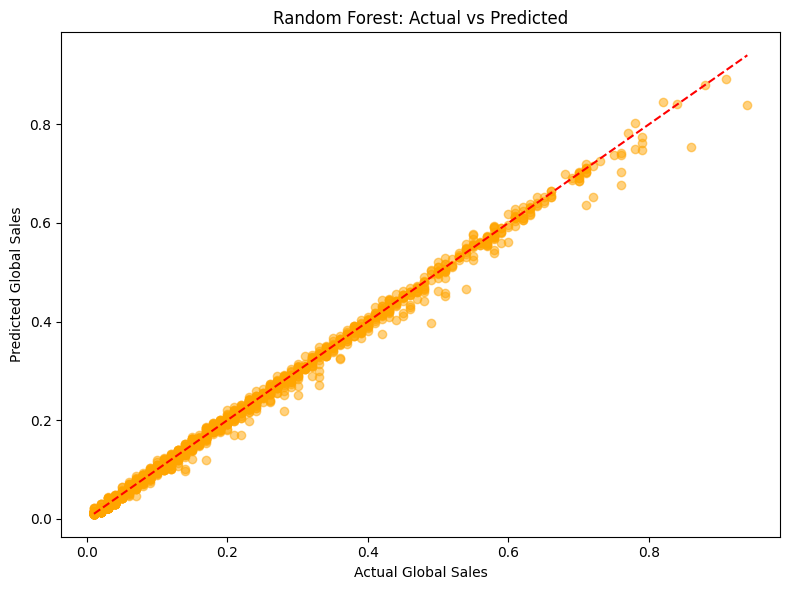

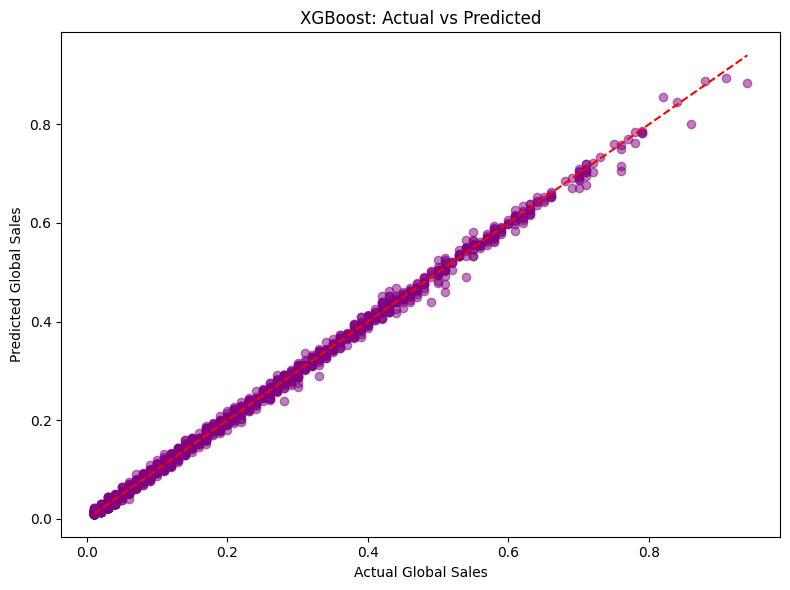

In [14]:
# Random Forest Plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, rf_pred, alpha=0.5, color='orange')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel("Actual Global Sales")
plt.ylabel("Predicted Global Sales")
plt.title("Random Forest: Actual vs Predicted")
plt.tight_layout()
plt.show()

# XGBoost Plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, xgb_pred, alpha=0.5, color='purple')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel("Actual Global Sales")
plt.ylabel("Predicted Global Sales")
plt.title("XGBoost: Actual vs Predicted")
plt.tight_layout()
plt.show()